# Лабораторная работа 9. Алгоритмы на графах.

In [2]:
!pip install networkx
import networkx as nx
import pylab
import matplotlib.pyplot as plt
G = nx.DiGraph()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
graph = {'A': ['B', 'C'],
         'B': ['A', 'D', 'E'],
         'C': ['A', 'F'],
         'D': ['B'],
         'E': ['B', 'F'],
         'F': ['C', 'E']}
j=""
for i in graph:#проходим по словарю
  j=""
  for g in graph[i]: #получаем список
    for jk in range(len(graph[i])): # определяем кол-во элемнтов в списке и задаем проход итераций
        print(graph[i],graph[i][jk])

  

['B', 'C'] B
['B', 'C'] C
['B', 'C'] B
['B', 'C'] C
['A', 'D', 'E'] A
['A', 'D', 'E'] D
['A', 'D', 'E'] E
['A', 'D', 'E'] A
['A', 'D', 'E'] D
['A', 'D', 'E'] E
['A', 'D', 'E'] A
['A', 'D', 'E'] D
['A', 'D', 'E'] E
['A', 'F'] A
['A', 'F'] F
['A', 'F'] A
['A', 'F'] F
['B'] B
['B', 'F'] B
['B', 'F'] F
['B', 'F'] B
['B', 'F'] F
['C', 'E'] C
['C', 'E'] E
['C', 'E'] C
['C', 'E'] E


Пусть задан грав множеством смежности:

In [4]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий направленный граф (https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html)

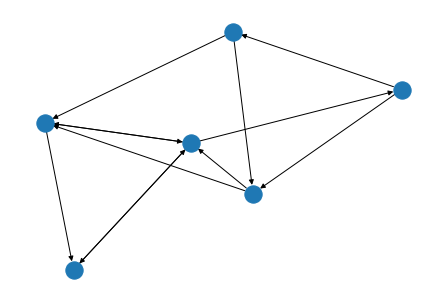

<Figure size 432x288 with 0 Axes>

In [5]:
N = len(pos)
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G)

pylab.figure ()
plt.show()

In [6]:
print(a)


[(0, 1), (0, 2), (1, 3), (1, 4), (2, 1), (2, 4), (3, 4), (4, 1), (4, 3), (4, 5), (5, 0), (5, 2)]


# 1. Алгоритмы обхода графа.

Во многих приложениях нужно уметь выписывать все вершины графа по одному разу, начиная с некоторой. Это делается с помощью обходов в глубину или в ширину.

Основная идея обходов:

- на каждом шаге рассмотреть очередную необработанную вершину;
- пометить эту вершину некоторым образом;
- до/после обработки данной вершины осуществить обход из всех нерассмотренных соседей.

Для упорядочивания вершин используется очередь (обход в ширину) или стек (обход в глубину).

# 1.1. Поиск в ширину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [7]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents


И программы востанавливающий маршрут:

In [8]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

# 1.2. Поиск в глубину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [9]:
def dfs(graph, s, out=0):
    level = {v: None for v in graph}  
    print(level) 
    level[s] = 0                                # уровень начальной вершины
    queue = [s]   
    print(queue)                              # добавляем начальную вершину в очередь
    while queue:                                # пока там что-то есть
        v = queue.pop(-1)                       # извлекаем вершину
        for w in graph[v]:                      # запускаем обход из вершины v
            if level[w] is None:                # проверка на посещенность
                queue.append(w)                 # добавление вершины в очередь
                level[w] = level[v] + 1         # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level

In [10]:
dfs(pos, 0, 1)

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None}
[0]
1 {0: 0, 1: 1, 2: 1, 3: None, 4: None, 5: None} [1, 2]
2 {0: 0, 1: 1, 2: 1, 3: None, 4: 2, 5: None} [1, 4]
3 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3, 5]
1 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} []


{0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3}

In [11]:
pos[2]

{1, 4}

# Пример 1.

Определим с помощью поиска в ширину кратчайший маршрут:

In [12]:
level, parents = bfs(pos, 0, out=0)

In [13]:
level

{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}

In [14]:
parents

{0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}

In [15]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


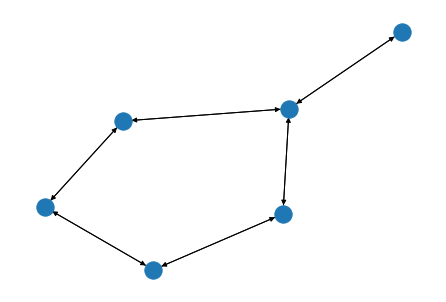

<Figure size 432x288 with 0 Axes>

[(0, 1), (0, 2), (1, 0), (1, 3), (1, 4), (2, 0), (2, 5), (3, 1), (4, 1), (4, 5), (5, 2), (5, 4)]


In [45]:
graph = {0: [1, 2],
         1: [0, 3, 4],         # A=0 B=1 C=2 d=3 E=4 F=5
         2: [0, 5],
         3: [1],
         4: [1, 5],
         5: [2, 4]}
j=""
G = nx.DiGraph()
spis=[]
for i in graph:#проходим по словарю
  j=""
  
  for jk in range(len(graph[i])): # определяем кол-во элемнтов в списке и задаем проход итераций
    spis+=[(i,graph[i][jk])]
G.add_nodes_from(range(len(graph)))
G.add_edges_from(spis)
nx.draw(G)
#nx.draw_networkx_edges(G, spis, width =2.0, edge_color='r', arrows=True)
pylab.figure ()
plt.show()
print(spis)
#nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color = node_colours, node_size = 500)
#nx.draw_networkx_labels(G, p)
#nx.draw_networkx_edges(G, p, edgelist=black_edges, width =2.0, edge_color='k', arrows=True)
#nx.draw_networkx_edges(G, p, edgelist=red_edges, width =3.0, edge_color='r', arrows=True)

Визуализируем этот маршрут:

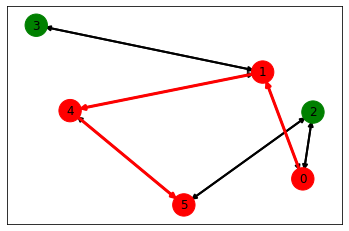

In [17]:
red_node = set(path)                                                # вершины маршрута
red_edges = [ (path[i],path[i+1]) for i in range(len(path)-1) ]     # рёбра маршрута

# разделение по цветам вершин и рёбер
node_colours = ['g' if not node in red_node else 'red' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# построение графа
#p = nx.spring_layout(G)

p = {0: [ 0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794,  1.        ],
 4: [-0.44016179,  0.07245783],
 5: [-0.03856228, -0.95176763]}

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color = node_colours, node_size = 500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=black_edges, width =2.0, edge_color='k', arrows=True)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width =3.0, edge_color='r', arrows=True)

plt.show()

In [18]:
# координаты вершин на рисунке
p

{0: [0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794, 1.0],
 4: [-0.44016179, 0.07245783],
 5: [-0.03856228, -0.95176763]}

# Упражнение 1

Две вершины (v и u) ориентированного графа называют сильно связными, если существует путь из v в u и существует путь из u в v. Ориентированный граф называется сильно связным, если любые две его вершины сильно связны.

Напишите функцию, использующую модифицированый алгоритм поиска в глубину (алгоритм Косарайю) для определения компонент сильой связности.

Алгоритм:

1. Инвертируем дуги исходного ориентированного графа.
2. Запускаем поиск в глубину на этом обращённом графе, запоминая, в каком порядке выходили из вершин.
3. Запускаем поиск в глубину на исходном графе, в очередной раз выбирая не посещённую вершину с максимальным номером в векторе, полученном в п.2.

Полученные из п.3 деревья и являются сильно связными компонентами.

Найдите и постройте графически с помощью этой функции компоенты сильной связности графа:

In [19]:
pos2 = {0: {1, 2},
        1: {3, 4},
        2: {1, 4},
        3: {4},
        4: {1, 3, 5},
        5: {0, 2},
        6: {3, 0, 5},
        7: {2, 1},
        8: {0, 7, 3},
        9: {2, 4, 6, 8}}

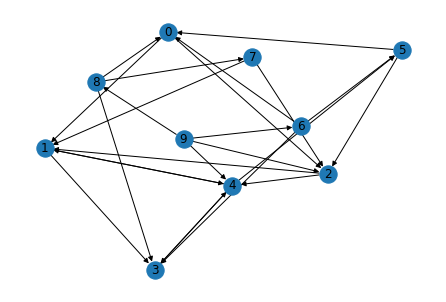

<Figure size 432x288 with 0 Axes>

In [20]:
N = 10
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos2[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

# Пример 2. Ход конём

Создадим две строки, комбинация которых даст нам обозночения всех клеток шахматного поля:

In [21]:
letters = 'abcdefgh'
numbers = '12345678'

Создадим структуру типа слоарь для хранения графа в формате множества смежности:

In [22]:
graph = dict()
graph

{}

Заполним имена вершин графа:

In [23]:
for l in letters:
    for n in numbers:
        graph[l+n] = set()
graph

{'a1': set(),
 'a2': set(),
 'a3': set(),
 'a4': set(),
 'a5': set(),
 'a6': set(),
 'a7': set(),
 'a8': set(),
 'b1': set(),
 'b2': set(),
 'b3': set(),
 'b4': set(),
 'b5': set(),
 'b6': set(),
 'b7': set(),
 'b8': set(),
 'c1': set(),
 'c2': set(),
 'c3': set(),
 'c4': set(),
 'c5': set(),
 'c6': set(),
 'c7': set(),
 'c8': set(),
 'd1': set(),
 'd2': set(),
 'd3': set(),
 'd4': set(),
 'd5': set(),
 'd6': set(),
 'd7': set(),
 'd8': set(),
 'e1': set(),
 'e2': set(),
 'e3': set(),
 'e4': set(),
 'e5': set(),
 'e6': set(),
 'e7': set(),
 'e8': set(),
 'f1': set(),
 'f2': set(),
 'f3': set(),
 'f4': set(),
 'f5': set(),
 'f6': set(),
 'f7': set(),
 'f8': set(),
 'g1': set(),
 'g2': set(),
 'g3': set(),
 'g4': set(),
 'g5': set(),
 'g6': set(),
 'g7': set(),
 'g8': set(),
 'h1': set(),
 'h2': set(),
 'h3': set(),
 'h4': set(),
 'h5': set(),
 'h6': set(),
 'h7': set(),
 'h8': set()}

Заполним множества смежности:

In [24]:
def add_edge(graph, v1, v2):
    graph[v1].add(v2)
    graph[v2].add(v1)              

In [25]:
for i in range(8):
    for j in range(8):
        v1 = letters[i]+numbers[j]
        v2 = ''
        if 0<=i+2<8 and 0<=j+1<8:
            v2 = letters[i+2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i-2<8 and 0<=j+1<8:
            v2 = letters[i-2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i+1<8 and 0<=j+2<8:
            v2 = letters[i+1]+numbers[j+2]
            add_edge(graph, v1, v2)            
            
        if 0<=i-1<8 and 0<=j+2<8:
            v2 = letters[i-1]+numbers[j+2]
            add_edge(graph, v1, v2)  

In [26]:
graph

{'a1': {'b3', 'c2'},
 'a2': {'b4', 'c1', 'c3'},
 'a3': {'b1', 'b5', 'c2', 'c4'},
 'a4': {'b2', 'b6', 'c3', 'c5'},
 'a5': {'b3', 'b7', 'c4', 'c6'},
 'a6': {'b4', 'b8', 'c5', 'c7'},
 'a7': {'b5', 'c6', 'c8'},
 'a8': {'b6', 'c7'},
 'b1': {'a3', 'c3', 'd2'},
 'b2': {'a4', 'c4', 'd1', 'd3'},
 'b3': {'a1', 'a5', 'c1', 'c5', 'd2', 'd4'},
 'b4': {'a2', 'a6', 'c2', 'c6', 'd3', 'd5'},
 'b5': {'a3', 'a7', 'c3', 'c7', 'd4', 'd6'},
 'b6': {'a4', 'a8', 'c4', 'c8', 'd5', 'd7'},
 'b7': {'a5', 'c5', 'd6', 'd8'},
 'b8': {'a6', 'c6', 'd7'},
 'c1': {'a2', 'b3', 'd3', 'e2'},
 'c2': {'a1', 'a3', 'b4', 'd4', 'e1', 'e3'},
 'c3': {'a2', 'a4', 'b1', 'b5', 'd1', 'd5', 'e2', 'e4'},
 'c4': {'a3', 'a5', 'b2', 'b6', 'd2', 'd6', 'e3', 'e5'},
 'c5': {'a4', 'a6', 'b3', 'b7', 'd3', 'd7', 'e4', 'e6'},
 'c6': {'a5', 'a7', 'b4', 'b8', 'd4', 'd8', 'e5', 'e7'},
 'c7': {'a6', 'a8', 'b5', 'd5', 'e6', 'e8'},
 'c8': {'a7', 'b6', 'd6', 'e7'},
 'd1': {'b2', 'c3', 'e3', 'f2'},
 'd2': {'b1', 'b3', 'c4', 'e4', 'f1', 'f3'},
 'd3': {'b

Проведём сканирование графа в ширину:

In [27]:
start = 'd4'
end = 'f7'

level, parents = bfs(graph, start)

И прлучим маршрут коня:

In [28]:
PATH(end, parents)

['d4', 'e6', 'g5', 'f7']

# Упражнение 2.

Нарисуйте граф соответствующий маршрутам коня по шахматной доске и отметте на нём найденный маршрут.

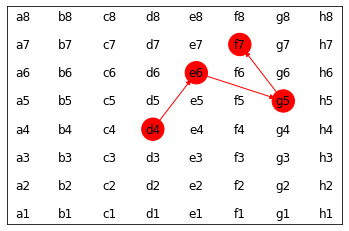

<Figure size 432x288 with 0 Axes>

In [29]:
Kpath = PATH(end, parents)
p = {}
for l in range(len(letters)):
    for n in range(len(numbers)):
        p[letters[l]+numbers[n]] = [-1 + l * 0.25, -1 + n * 0.25]
G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)
red_node = set(Kpath)
red_edges = [ (Kpath[i],Kpath[i+1]) for i in range(len(Kpath)-1) ]

node_colours = ['w' if not node in red_node else 'r' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width=1.0, edge_color='r', arrows=True)

pylab.figure()
plt.show()

# Упражнение 3. Раскраски.

Рассмотрим граф G(V,E), имеющий V вершин и E ребер. Раскраской графа G называется окрашивание вершин графа G такое, что никакие две смежные вершины не имеют одинаковый цвет. Хроматическое число графа X(G) - это наименьшее число цветов, которое используется для раскраски графа. Известен жадный алгоритм раскраски графа.

Жадный алгоритм последовательного раскрашивания:

Входные данные: граф G (V,E)
Выходные данные: массив c[v] раскрашенных вершин
1. Для всех вершин определить множество А ={1,2,3..,n} всех цветов.
2. Выбрать стартовую вершину (с которой начинаем алгоритм). Раскрасить вершину в цвет color. Вычеркнуть этот цвет из множества цветов всех вершин, смежных со стартовой.
3. Выбрать не раскрашенную вершину v
4. Раскрасить выбранную вершину в минимально возможный цвет из множества А. Вычеркнуть этот цвет из множества цветов всех вершин, смежных с вершиной v.
5. Проделать шаг 3, шаг 4 для всех нераскрашенных вершин графа.

На основе этого алгоритма раскрасьте граф из задачи про коня.

In [30]:
def ggca(graph):
    colors = {i: None for i in graph.keys()}
    for i in graph.keys():
        minimal_set = []
        for s in graph[i]:
            if colors[s] is not None:
                minimal_set.append(colors[s])
        for c in range(len(graph)):
            if c not in minimal_set:
                colors[i] = c
                break
    return colors


In [31]:
r = ggca(graph)

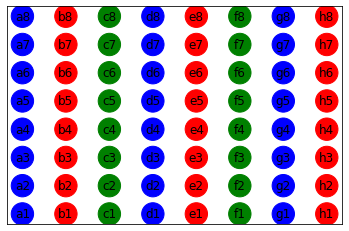

<Figure size 432x288 with 0 Axes>

In [32]:
G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)

node_colours = ['b' if r[node] == 0 else 'r' if r[node] == 1 else 'g' for node in G.nodes()]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)

pylab.figure()
plt.show()

# Домашнее задание (базовое):

# Задание 1. Алгоритм Дейкстры

Напишите функцию реализуущую алгоритм Дейкстры.

In [33]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Dijkstra.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)


In [34]:
import sys

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
    
    def min_distance(self, dist, sptSet):
        min = sys.maxsize
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index
    
    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        for cout in range(self.V):
            u = self.min_distance(dist, sptSet)
            sptSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v]
        self.show(dist)
    
    def show(self, dist):
        print("Вершина  Расстояние до источника")
        for node in range(self.V):
            print(node, "\t", dist[node])

# Задание 2. 

Сгенерируйте случайный взвешенный граф. И определите на нём маршрут минимальной длины с помощью алгоритма Дейкстры.

Вершина  Расстояние до источника
0 	 0
1 	 10
2 	 30
3 	 53
4 	 11
5 	 63
6 	 37
7 	 28
8 	 3
9 	 86


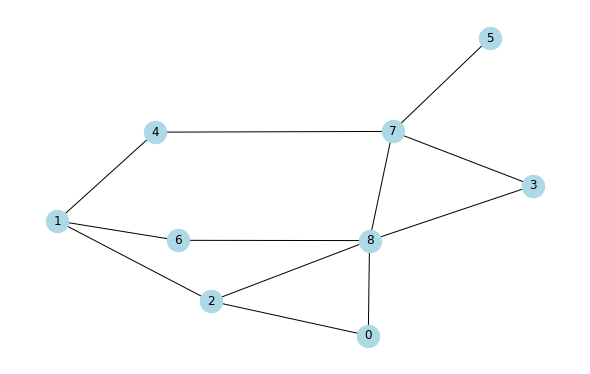

In [36]:
from itertools import combinations, groupby
import networkx as nx
import random

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G


nodes = random.randint(5,12)
seed = random.randint(1,12)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


#random.seed(datetime.now())
size = int(random.uniform(4, 17))
w = [[0] * size] * size
for i in range(len(w)):
    for j in range(len(w[i])):
        w[i][j] = int(random.uniform(0, 101))
        
g = Graph(size)
g.graph = w

g.dijkstra(0)

# Задание 3.

Проиллюстрируйте работу одного из алгоритмов (поиска в ширину или глубину, Дейкстры) с помощью визуализации действий с графом на каждой итерации с помощью библиотек networkx и matplotlib, аналогично примеру 1.

In [ ]:
import time

G = nx.DiGraph()
a = [(i, j) for i in pos for j in pos[i]]

G.add_edges_from(a)
node_colours = ['b' for node in G.nodes()]
edges = [i for i in G.edges()]
p = nx.spring_layout(G)

pylab.figure()
plt.show()

def redraw(prev, curr):
    if prev:
        node_colours[prev] = 'b'
        node_colours[curr] = 'r'
    nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
    nx.draw_networkx_labels(G, p)
    nx.draw_networkx_edges(G, p, edgelist=edges, width=1.0, edge_color='k', arrows=True)
    pylab.figure()
    plt.show()

def bfs_vis(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0
    queue = [s]
    prev = None
    while queue:
        v = queue.pop(0)
        redraw(prev, v)
        prev = v
        time.sleep(1)
        for w in graph[v]:
            if level[w] is None:
                queue.append(w)
                parents[w] = v
                level[w] = level[v] + 1
        if out: print(level[w], level, queue)
    return level, parents

time.sleep(1)

bfs_vis(pos, 0)

# Задание 4. В библиотеке.

Используйте какой-нибудь интересный алгоритм из https://networkx.github.io/documentation/stable/reference/algorithms/index.html

In [ ]:
!pip install KMeans

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
#Спектральная кластеризация
#График лапласианского
# a 2x2 matrix
A = np.array([[0,1],[-2,-3]])


vals, vecs = np.linalg.eig(A)


for i, value in enumerate(vals):
    print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
D = np.diag(A.sum(axis=1))
print(D)
L = D-A
LD = np.diag(A.sum(axis=1))


L = D-A
print(L)

vals, vecs = np.linalg.eig(L)


vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]


kmeans = KMeans(n_clusters=4)
kmeans.fit(vecs[:,1:4])
colors = kmeans.labels_

print("Clusters:", colors)

# Домашнее задание (дополнительное):

# Задание. Картинка.

Существует много способов кодирования изображений. Рассмотрим два из них. Пусть изображения состоят только из чёрных и белых пикселей. В каждом из них есть хотя бы один чёрный пиксель, и все чёрные пиксели составляют одну связанную область (соединены сторонами друг с другом). 

Оба представления описывают расположение только чёрных пикселей.

Первое представление задаёт в первой строке количество чёрных пикселей, а в следующих строках — координаты каждого чёрного пикселя. Пиксели перечислены в порядке возрастания X-координат. В случае равенства X-координат они перечислены в порядке возрастания Y-координат. Изображение, показанное на рисунке, кодируется следующим образом:

6

2 3

2 4

3 3

3 4

4 2

4 3

Второе представление задаёт в первой строке координаты самого нижнего из самых левых чёрных пикселей. Каждая из следующих строк содержит описание соседей одного из пикселей. Сначала описываются соседи самого нижнего из самых левых пикселей, затем описываются соседи его первого соседа (если он существует), затем соседи его второго соседа (если он также существует). Когда все непосредственные соседи описаны, следует описание соседей первого соседа, затем описание соседей второго соседа и так далее.

Каждая строка описания содержит не более одной буквы для каждого из соседей: R для правого, T для верхнего, L для левого, B для нижнего. Если сосед уже был описан, он не включается в строку описания, если ещё не был — включается. Каждый пиксель описывается одной строкой. Соседи перечисляются в порядке против часовой стрелки, начиная с правого. Каждая строка описания, кроме последней, заканчивается запятой. Последняя строка заканчивается точкой. Изображение, показанное на рисунке, кодируется следующим образом:

2 3

RT,

RT,

,

B,

,

.

Закодированное таким образом изображение имеет следующий вид. 

In [ ]:
# Так можно добавлять картинки

from IPython.display import Image              # вызов из библиотеки определённой функции
Image("Кодирование изображений (Графы).png")   # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

Напишите программу выполняющую изменение кодировки из первого формата во второй и выводящую соответствующее изображение на экран. Начальное и переконвертированное изображение должно храниться в файлах с соответствующими размерностями: .format1 и .format2.

# Задание. Алгоритм Форда - Беллмана

Напишите функцию реализуущую алгоритм Форда - Беллмана
(https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0).

In [ ]:
import math

def ford_bellman(W, start):
    N = len(W)
    F = [[math.inf] * N for i in range(N)]
    F[0][start] = 0 
    for k in range(1, N): 
        for i in range(N): 
            F[k][i] = F[k - 1][i]
            for j in range(N):
                if F[k - 1][j] + W[j][i] < F[k][i]:
                    F[k][i] = F[k - 1][j] + W[j][i]
    return F
W = [[1, 2, 3],
     [1, 2, 9],
     [9, 5, 1]]

ford_bellman(W, 0)


# Задание. Лабирит.

Найдите выход из лабирита с помощью различных алгоритмов и сравите их. (Взвести рёбра пропорционально их длине.)

In [ ]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Лабиринт.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

# Задание. Электроскутер.

У Еремея есть электросамокат — и он хочет доехать от дома до института, затратив как можно меньше энергии. Весь город расположен на холмистой местности и разделён на квадраты. Для каждого перекрёстка известна его высота в метрах над уровнем моря. Если ехать от перекрёстка с большей высотой до смежного с ним перекрёстка с меньшей высотой, то электроэнергию можно аккумулировать (заряжая скутор), а если наоборот, то расход энергии равен разнице высот между перекрёстками.
Помогите Еремею спланировать маршрут, чтобы он затратил наименьшее возможное количество энергии от дома до института и определите это количество.